# E-commerce Sales Analysis Report

## 1. Introduction

### Objective

The primary objective of this analysis is to gain insights into the sales performance of an e-commerce business. By examining various aspects such as order quantities, unit prices, customer behavior, and sales trends, we aim to identify patterns, outliers, and potential areas for improvement.



In [3]:
#Importing Libraries pandas and matplotlib 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
#Reading of dataset and storing in the dataframe variable 
df = pd.read_csv(r'D:\Kaggle Projects\data.csv',encoding='latin1')

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Data Cleaning and Preprocessing:

##### Below are the few steps which were taken to clean the data and handling all these value carefully so that integrity of analysis is maintained 

- Checking for the Null values 
- Checking for the missing values
- Removing duplicate enteries
- Changing the Data Type if not relevant to the analysis

In [6]:
#check for all data

df.shape

(541909, 8)

In [7]:
#Removing the duplicates 

df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [8]:
# Checking for dataTypes 
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
#Checking for null values 
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
#Dropping the Column where 'Description' is Null
df = df.dropna(subset=['Description'])

In [11]:
#Checking for the unit price where it is zero
df[df['UnitPrice']==0.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6391,536941,22734,amazon,20,12/3/2010 12:08,0.0,NaN,United Kingdom
6392,536942,22139,amazon,15,12/3/2010 12:08,0.0,NaN,United Kingdom
7313,537032,21275,?,-30,12/3/2010 16:50,0.0,NaN,United Kingdom
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
13217,537425,84968F,check,-20,12/6/2010 15:35,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,NaN,United Kingdom


In [12]:
#Filtering the dataset where unit price is not zero(0)
df = df[df['UnitPrice']!=0]

In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [14]:
#Changing the datatype of the column CustomerID

df['CustomerID'] = df['CustomerID'].astype('string')

In [15]:
#Changing the InvoiceDate datatype to datetime format

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) 

## Exploratory Data Analysis (EDA):



In [16]:
df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,539394.000000,539394.000000
mean,9.845871,4.632614
std,215.412253,96.984656
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [17]:
#Inspecting the negative values and these were excluded from the analysis 

df[(df['Quantity']<0) | (df['UnitPrice']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [18]:
# Excluding all the enteries which are negative 

df = df[(df['Quantity']>=0) & (df['UnitPrice'] >=0)]

In [19]:
#Again performing the descriptive analysis

df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


#### Observations and Recommendations

- High Variability in Quantity: The large standard deviation in quantity indicates significant variability in order sizes. It may be any additional patterns or outliers.

- Large Orders: The maximum quantity of 80,995 is extremely high compared to the 75th percentile of 10. This suggests there are some exceptionally large orders.

- Wide Range of Prices: The high standard deviation in unit price suggests a broad range of product prices.

- Outliers: Both quantity and unit price have significant outliers (80,995 for quantity and 13,541.33 for unit price). Consider analyzing these outliers separately to determine if they skew your overall analysis or represent special cases (e.g., bulk orders, high-value items).

- Minimum Unit Price: The minimum unit price of 0.001 could indicate errors or promotional items. It may be worth investigating these entries to ensure data accuracy.

In [20]:
df[df['Quantity']==80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


##### Findings on the Quantity - 80995 

- This is the bulk purchase of the customerID - 16446 from the Country: UK 

In [21]:
df[df['UnitPrice']==13541.33]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,<NA>,United Kingdom


##### Findings on the Unitprice - 13541.33 
- This is an Amazon fee paid by the unknown customer from country 'UK' 

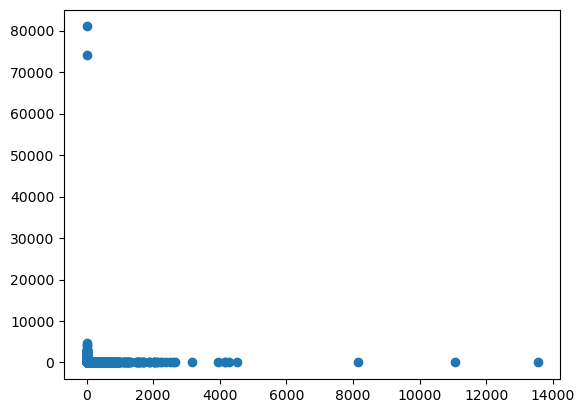

In [22]:
plt.scatter(df['UnitPrice'],df['Quantity'])
plt.show()

In [23]:
# Fill NaN values with 'Unknown' or any other string identifier
df.loc[:, 'CustomerID'] = df['CustomerID'].fillna('Unknown')

In [24]:
# Adding Sales column to indentify the Monthly & Yearly Sales 

df.loc[:,'Sales'] = df['Quantity']*df['UnitPrice']

C:\Users\91896\AppData\Local\Temp\ipykernel_31204\2553715927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Sales'] = df['Quantity']*df['UnitPrice']


In [25]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


## Sales Analysis


#### Sales By Country 

Distribution of sales across different countries was analyzed to understand regional performance.

In [26]:
sales_by_country = df.groupby('Country')['Sales'].sum().sort_values(ascending =False).reset_index().head(5)

In [27]:
sales_by_country

,Country,Sales
0,United Kingdom,9025222.084
1,Netherlands,285446.340
2,EIRE,283453.960
3,Germany,228867.140
4,France,209715.110


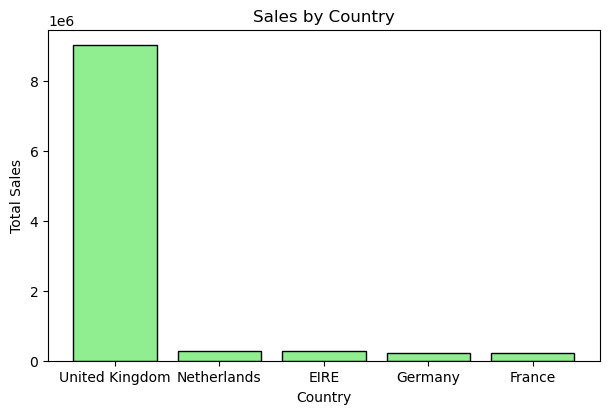

In [50]:
#Plot to identify the Sales by Country wise 

plt.figure(figsize=(6,4))
plt.bar(sales_by_country['Country'],sales_by_country['Sales'],color='lightgreen',edgecolor='black')
plt.tight_layout()
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.title('Sales by Country')
plt.show()

# Top Customer Contributing to Higher Sale Generation


Identified top customers contributing significantly to sales, providing insights into key customer segments

In [29]:
sales_by_customer = df.groupby('CustomerID')['Sales'].sum().reset_index().head(10).sort_values(by='Sales',ascending = False)

In [30]:
sales_by_customer

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
9,12356.0,2811.43
5,12352.0,2506.04
2,12348.0,1797.24
3,12349.0,1757.55
7,12354.0,1079.40
8,12355.0,459.40
4,12350.0,334.40
6,12353.0,89.00


## Sales by Month and Year:

- Analyzed sales trends on a monthly and yearly basis to uncover seasonality and growth patterns.


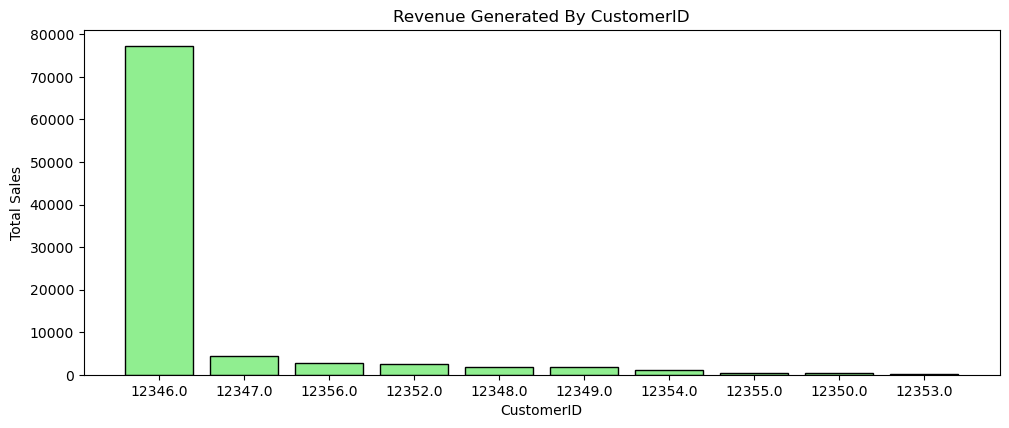

In [31]:
#Plot by customerID

plt.figure(figsize=(10,4))
plt.bar(sales_by_customer['CustomerID'],sales_by_customer['Sales'],color='lightgreen',edgecolor='black')
plt.tight_layout()
plt.ylabel('Total Sales')
plt.xlabel('CustomerID')
plt.title('Revenue Generated By CustomerID')
plt.show()

In [32]:
df.loc[:,'Month'] = df['InvoiceDate'].dt.strftime('%B')

C:\Users\91896\AppData\Local\Temp\ipykernel_31204\4074214507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Month'] = df['InvoiceDate'].dt.strftime('%B')


In [33]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,December
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,December
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,December
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,December


In [34]:
month_sales = df.groupby(['Month'])['Sales'].sum().sort_values().reset_index()

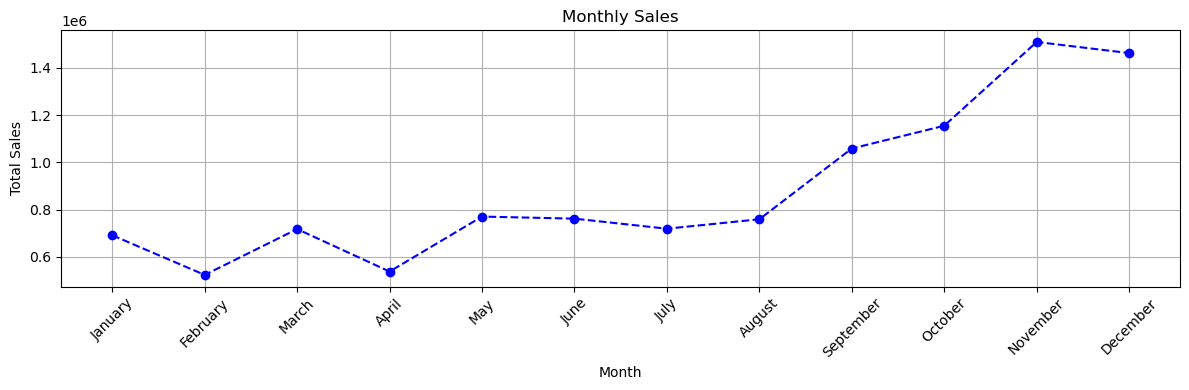

In [35]:
# Sort months in chronological order
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the month_sales DataFrame based on months_order
month_sales['Month'] = pd.Categorical(month_sales['Month'], categories=months_order, ordered=True)
month_sales = month_sales.sort_values('Month')

# Plotting the data
plt.figure(figsize=(12, 4))
plt.plot(month_sales['Month'], month_sales['Sales'], marker='o', linestyle='--', color='b')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
df.loc[:,'YearMonth'] = df['InvoiceDate'].dt.to_period('M')

C:\Users\91896\AppData\Local\Temp\ipykernel_31204\386618888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'YearMonth'] = df['InvoiceDate'].dt.to_period('M')


In [37]:
df.groupby('YearMonth')['Sales'].sum().sort_values().reset_index()

,YearMonth,Sales
0,2011-02,523631.890
1,2011-04,537808.621
2,2011-12,638792.680
3,2011-01,691364.560
4,2011-03,717639.360
5,2011-07,719221.191
6,2011-08,759138.380
7,2011-06,761739.900
8,2011-05,770536.020
9,2010-12,823746.140


In [38]:
#Converting YearMonth to datetime format in order to plot the graph or to show the trend 
df['YearMonth'] = df['YearMonth'].dt.to_timestamp()

C:\Users\91896\AppData\Local\Temp\ipykernel_31204\2618273115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearMonth'] = df['YearMonth'].dt.to_timestamp()


In [39]:
df['YearMonth'].info()

<class 'pandas.core.series.Series'>
Index: 530104 entries, 0 to 541908
Series name: YearMonth
Non-Null Count   Dtype         
--------------   -----         
530104 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.1 MB


In [40]:
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

In [41]:
monthly_sales

,YearMonth,Sales
0,2010-12-01,823746.140
1,2011-01-01,691364.560
2,2011-02-01,523631.890
3,2011-03-01,717639.360
4,2011-04-01,537808.621
5,2011-05-01,770536.020
6,2011-06-01,761739.900
7,2011-07-01,719221.191
8,2011-08-01,759138.380
9,2011-09-01,1058590.172


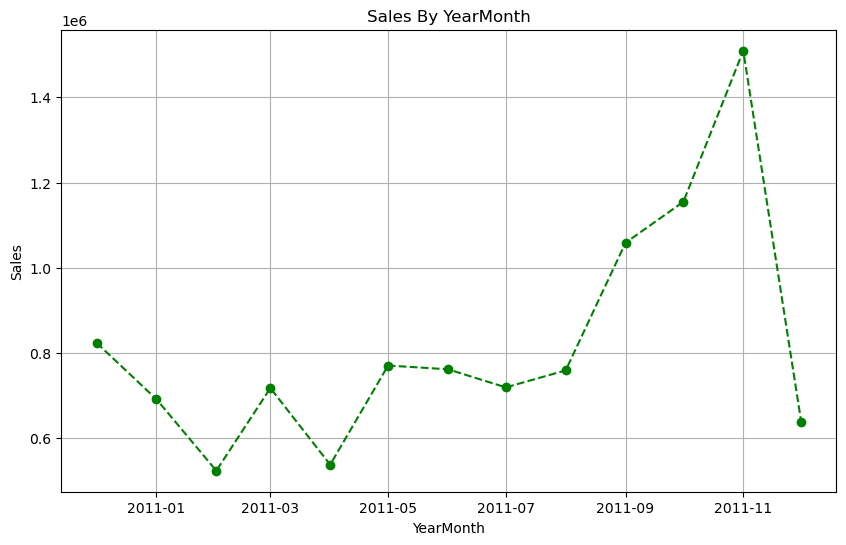

In [42]:
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['YearMonth'],monthly_sales['Sales'],marker='o',linestyle='--', color='g')
plt.grid(True)
plt.xlabel('YearMonth')
plt.ylabel('Sales')
plt.title('Sales By YearMonth')
plt.show()

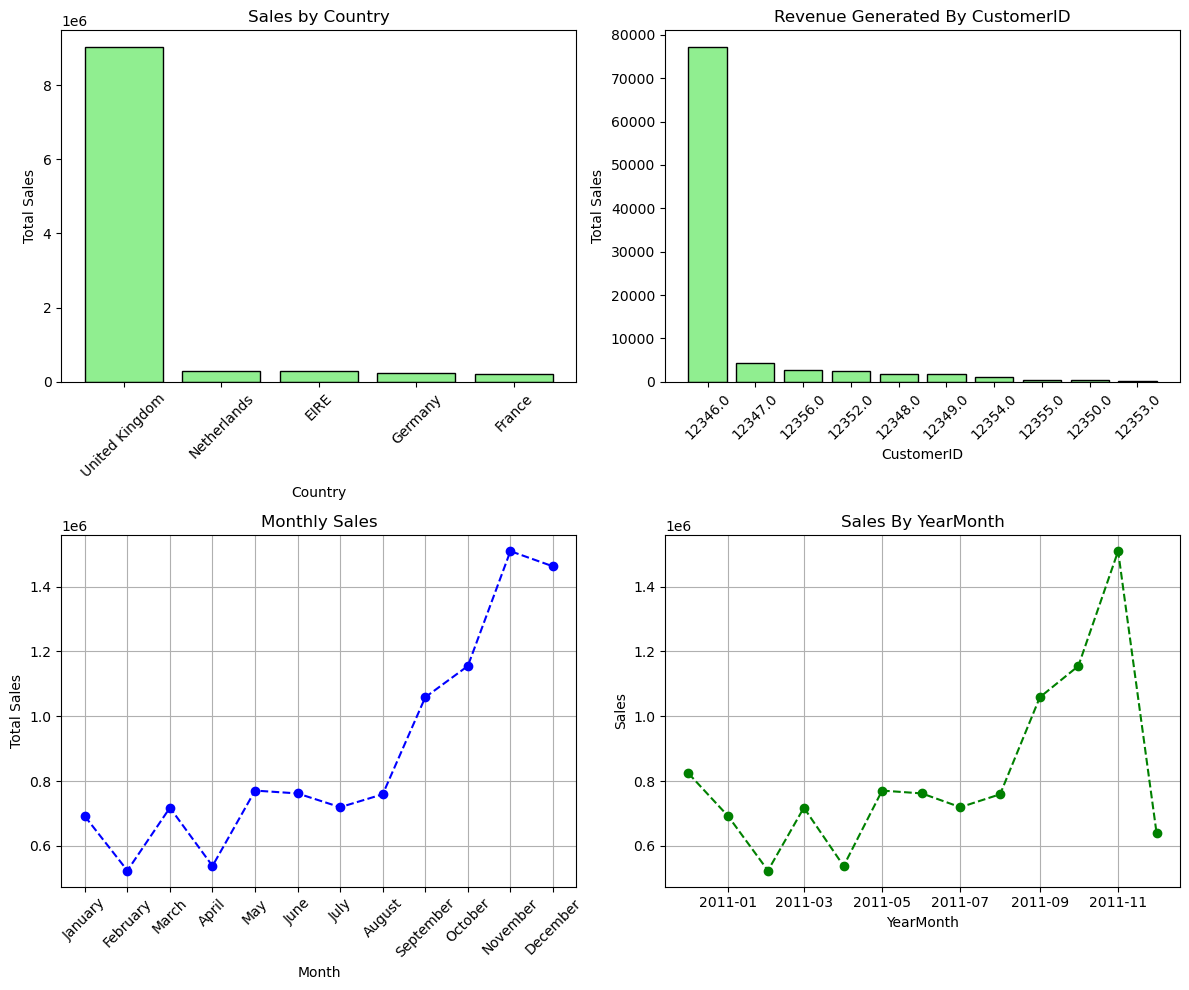

In [51]:
# Plotting all the charts using sub plots 

plt.figure(figsize =(12,10))

plt.subplot(2,2,1)
#Bar chart 
plt.bar(sales_by_country['Country'],sales_by_country['Sales'],color='lightgreen',edgecolor='black')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation =45)
plt.title('Sales by Country')


plt.subplot(2,2,2)
#Bar chart for customer-sales generation 
plt.bar(sales_by_customer['CustomerID'],sales_by_customer['Sales'],color='lightgreen',edgecolor='black')
plt.ylabel('Total Sales')
plt.xlabel('CustomerID')
plt.xticks(rotation =45)
plt.title('Revenue Generated By CustomerID')


plt.subplot(2,2,3)
#Line chart -Monthly view

# Sort months in chronological order
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Reorder the month_sales DataFrame based on months_order
month_sales['Month'] = pd.Categorical(month_sales['Month'], categories=months_order, ordered=True)
month_sales = month_sales.sort_values('Month')

# Plotting the data
# plt.figure(figsize=(12, 4))
plt.plot(month_sales['Month'], month_sales['Sales'], marker='o', linestyle='--', color='b')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.grid(True)
plt.xticks(rotation=45)


plt.subplot(2,2,4)
#line chart for Year-Month

plt.plot(monthly_sales['YearMonth'],monthly_sales['Sales'],marker='o',linestyle='--', color='g')
plt.grid(True)
plt.xlabel('YearMonth')
plt.ylabel('Sales')
plt.title('Sales By YearMonth')
plt.tight_layout()
plt.show()



# Insights from the Above Analysis

- Highest Sales generated from country UK followed by Netherland ,EIRE and Germany 
- Highest contribution from the Customer ID - 12346 wiz., 77183.60/- 
- In the November month there is highest sales has been generated in ecommerce business or we can say that seasonality sales has been occured during this period.

# Conclusion

The analysis provided several key insights into the e-commerce business’s sales performance:

- Order Quantity: High variability and significant outliers suggest a need for closer examination of large orders and pricing strategies.
- Unit Price: The broad range of prices indicates diverse product offerings and potential pricing optimization opportunities.
- Customer Insights: Identifying top customers and their purchasing behavior can help in targeted marketing and customer retention strategies.
- Sales Trends: Understanding sales trends over time can aid in inventory planning and promotional activities.


# Recommendations

- Analyze Outliers: Conduct a detailed analysis of significant outliers to determine their cause and impact.

- Investigate Pricing Strategies: Review pricing strategies to ensure they align with business objectives and market conditions.

- Target Key Customers: Focus on top customers with personalized marketing strategies to enhance customer loyalty.

- Seasonal Planning: Use sales trend data for better inventory and promotional planning to capitalize on peak seasons.
